In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

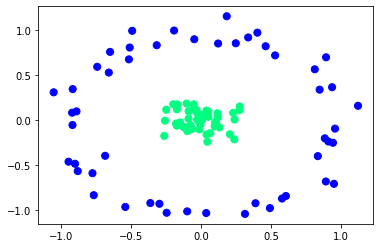

In [5]:
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=.1,noise=.1)

plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=50)

## LINEAR SVC

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [7]:
classifier=SVC(kernel='linear')
classifier.fit(x_train,y_train.ravel())
y_pred=classifier.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6

In [9]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(x, y, clf):
    X_set, y_set = x, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


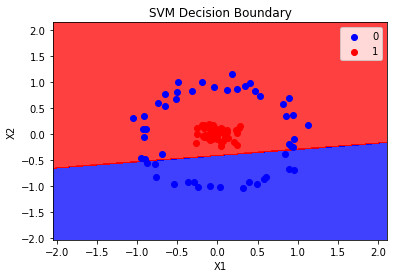

In [11]:
plot_decision_boundary(x,y,classifier);

NOT GOOD
[CAUSE NON-LINEAR DATA]

## RBF SVC

In [12]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1)) # radial basis function
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

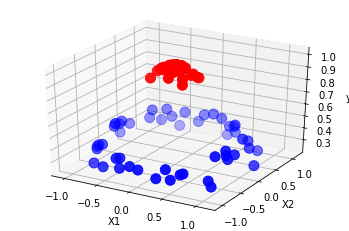

In [14]:
plot_3d_plot(x,y);

In [15]:
rbf=SVC(kernel="rbf")
rbf.fit(x_train,y_train)
y_pred=rbf.predict(x_test)

accuracy_score(y_test,y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


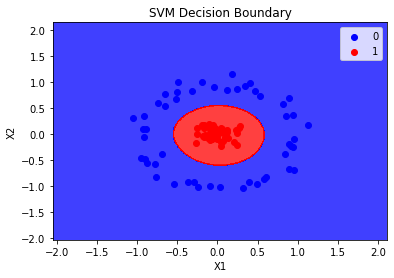

In [16]:
plot_decision_boundary(x,y,rbf)

## POLY SVC

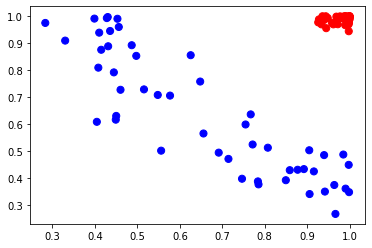

In [22]:
x_new=np.exp(-(x**2)) #polynomial

plt.scatter(x_new[:,0],x_new[:,1],c=y,cmap='bwr',s=50);

In [17]:
poly=SVC(kernel="poly",degree=2)
poly.fit(x_train,y_train)
y_pred=poly.predict(x_test)

accuracy_score(y_test,y_pred)

1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


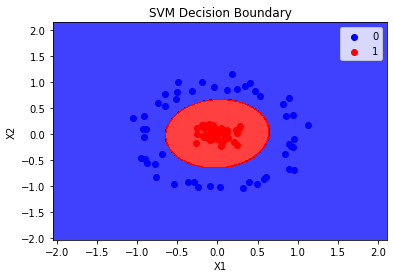

In [18]:
plot_decision_boundary(x,y,poly)